In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")
sns.set(font_scale = 2.5) #matplotlib의 기본 scheme 을 seaborn scheme 으로 셋팅

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system..')

In [38]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

## feature는 Pclass, Age, SibSp, Parch, Fare, 
## 예측하려는 target label 은 Survived 입니다.

In [39]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## pandas의 describe() 메소드를 이용해 각 feature들의 통계치 반환

In [41]:
df_train.describe() # count가 다른 feature 발견 -> null값 존재

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
df_test.describe() # count가 다른 feature 발견 -> null값 존재

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## NULL data 체크하기

### age, cabin, embarked에 null 존재 확인

In [43]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [44]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


### mano 라이브러리를 이용해 null data의 존재 찾기

<AxesSubplot:>

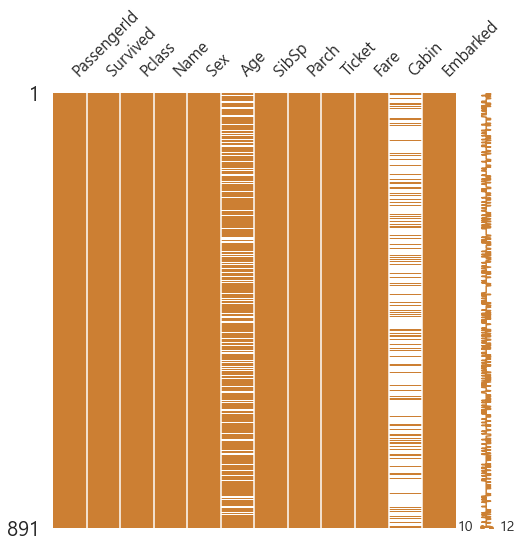

In [45]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

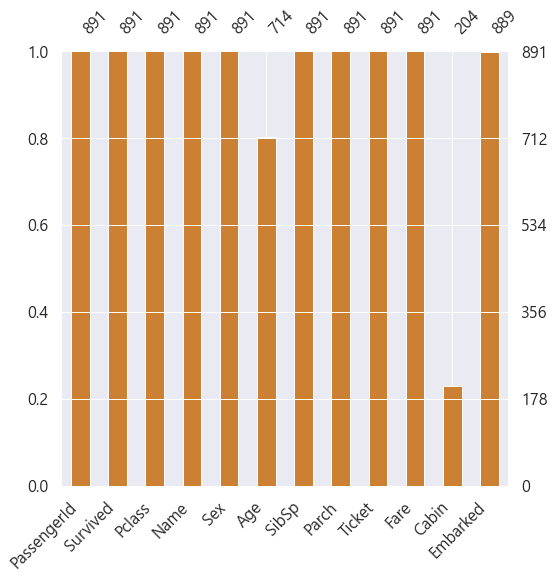

In [46]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

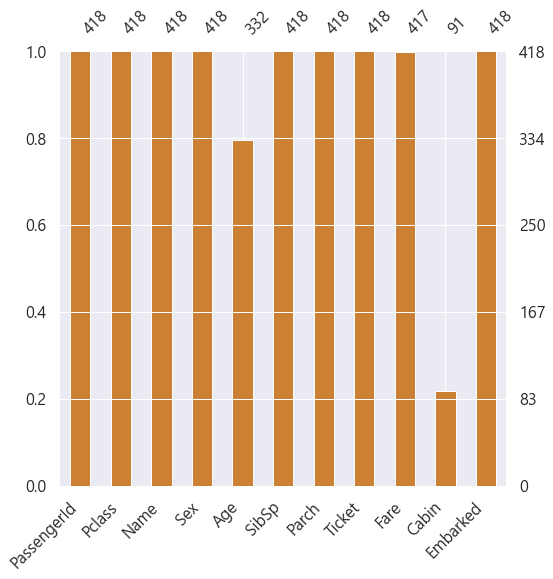

In [47]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))


## target label 확인

### target label 이 어떤 distribution 을 가지고 있는 지 확인해봐야 합니다.
### 지금 같은 binary classification 문제의 경우에서, 1과 0의 분포가 어떠냐에 따라 모델의 평가 방법이 달라 질 수 있습니다.

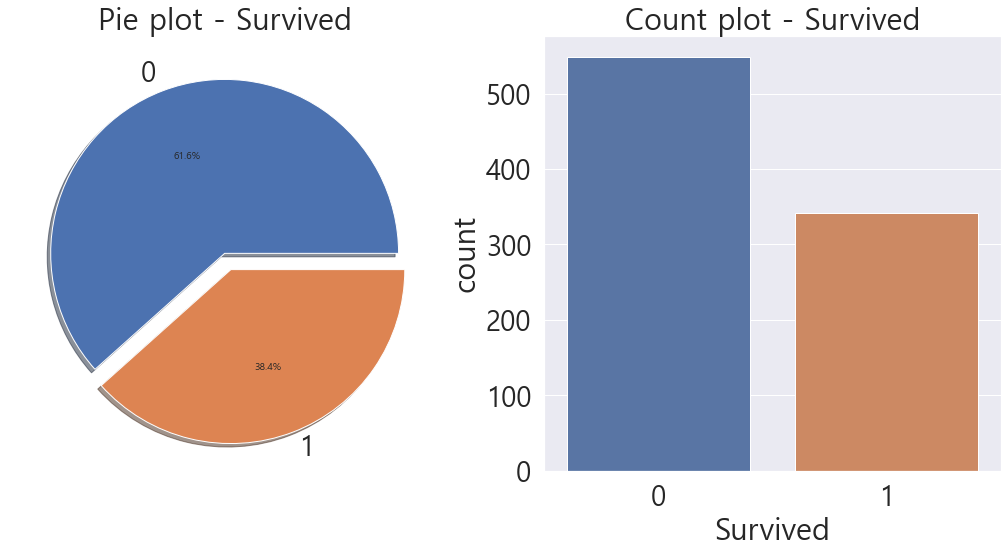

In [48]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%',
                                           ax = ax[0], shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data = df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

### 생존자는 38.4%

# 데이터 분석

## Pclass에 따른 생존률의 차이

### Groupby를 이용해 Pclass별 생존자 구하기
### count를 통해 Pclass별 승객이 몇명인지 구하고

In [49]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


### sum을 통해 Pclass별 생존자(survived = 1)의 합을 구함

In [50]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


### pandas의 crosstab을 사용하면 더 수월하게 확인 가능

In [51]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


## grouped 객체에 mean() 을 하게 되면, 각 클래스별 생존률을 얻을 수 있습니다. class 1 이면 아래와 같습니다.
# 80(80+136)≈0.63

<AxesSubplot:xlabel='Pclass'>

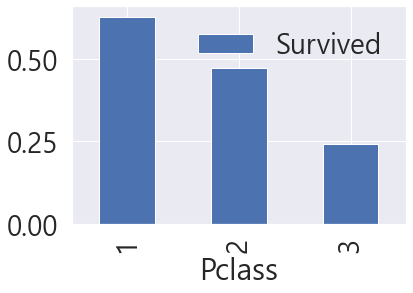

In [52]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True)\
.mean().sort_values(by = 'Survived', ascending = False).plot.bar()

## seaborn의 countplot을 이용해 분석하기

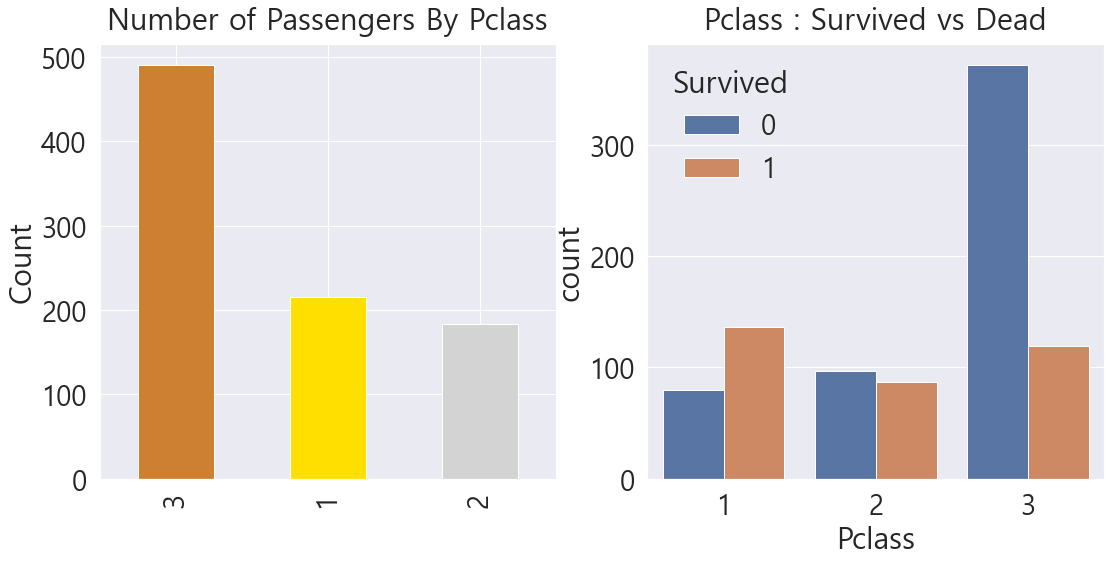

In [53]:
y_position = 1.02

f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = df_train, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y = y_position)
plt.show()

### 클래스가 높을수록 생존 확률이 높다. Pclass는 생존에 큰 영향을 미친다

## Sex별 생존률

### 차트로 비교

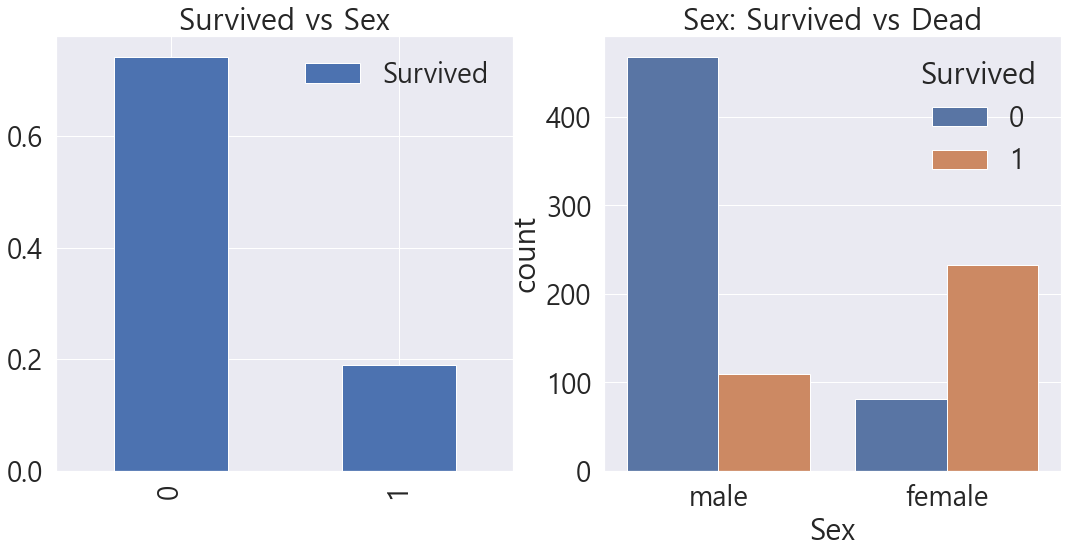

In [54]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue = 'Survived', data = df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

### groupby로 비교

In [55]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [56]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### 여자가 생존할 확률이 높다는 것을 알 수 있음

## Pclass, Sex 두 가지에 관해 생존여부 확인해보기

### seaborn의 factorlpot을 이용하여 3차원 그래프 그리기

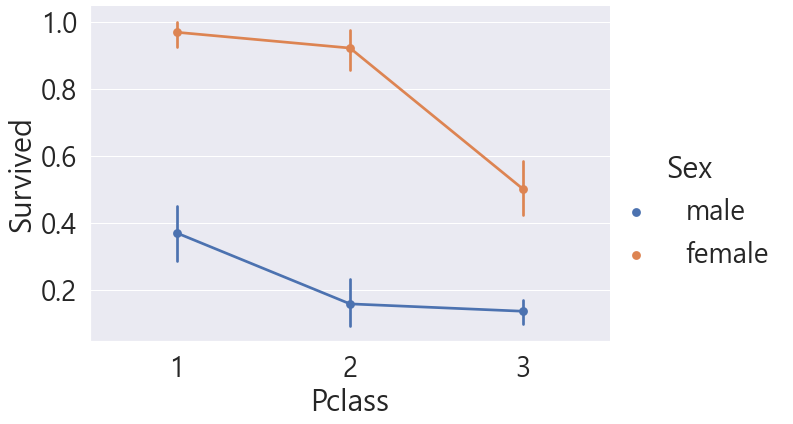

In [57]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = df_train,
              size = 6, aspect = 1.5)

### 모든 클래스에서 female의 생존률이 male보다 높다는 것을 확인, 성별 상관 없이 Pclass가 높을수록 생존 확률이 높아짐.

### factorplot의 hue 대신 column으로 구분

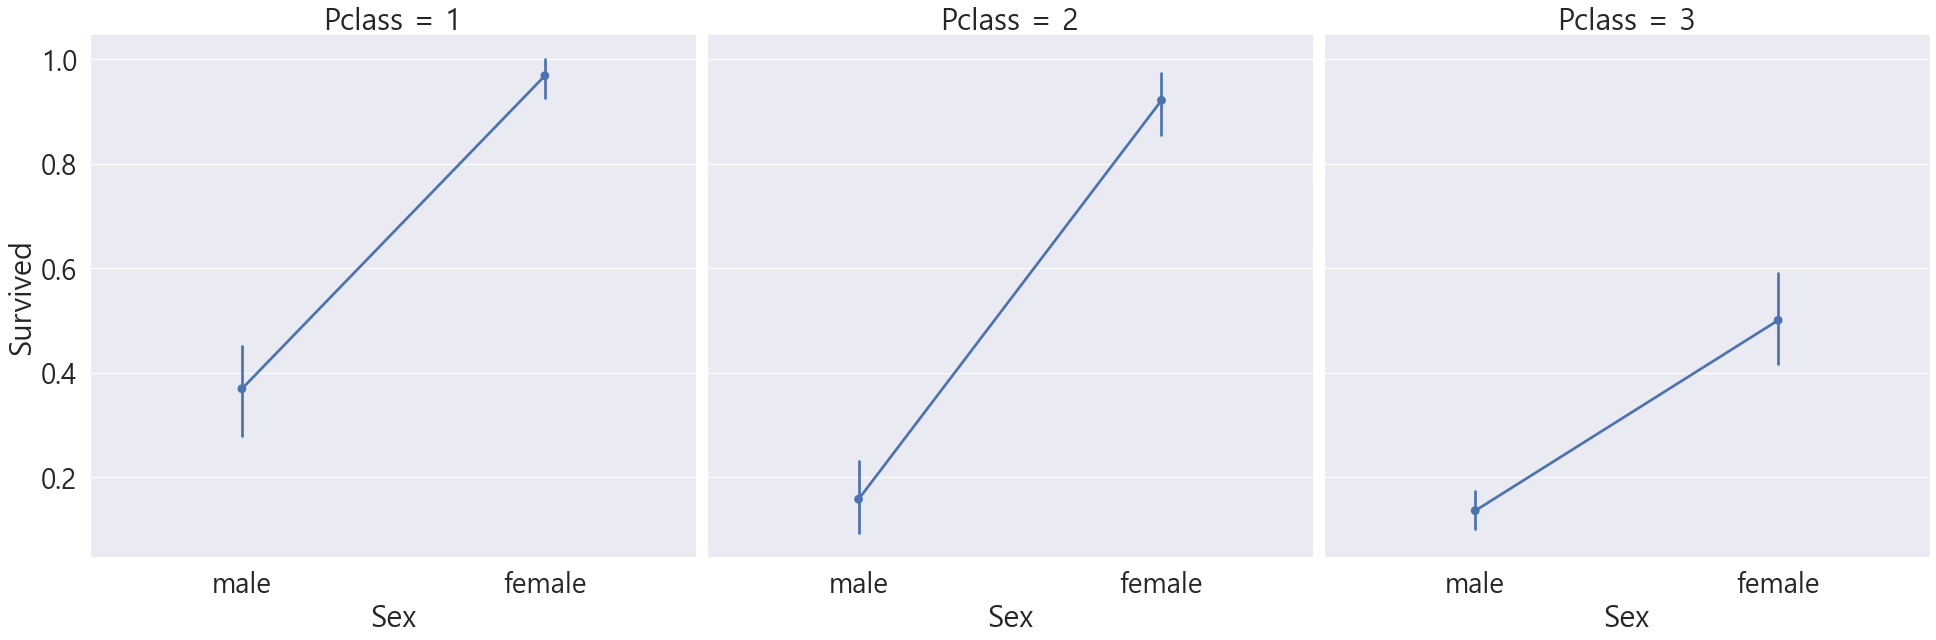

In [58]:
sns.factorplot(x = 'Sex', y = 'Survived', col = 'Pclass', data = df_train,
              satureation = .5, size = 9, aspect = 1)

## Age에 따른 승객의 생존률

In [59]:
print(' 제일 나이 많은 탑승객의 나이 : {:.1f} Years'.format(df_train['Age'].max()))
print(' 제일 어린 탑승객의 나이 : {:.1f} Years'.format(df_train['Age'].min()))
print(' 탑승객의 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

 제일 나이 많은 탑승객의 나이 : 80.0 Years
 제일 어린 탑승객의 나이 : 0.4 Years
 탑승객의 평균 나이 : 29.7 Years


### 생존에 따른 Age의 히스토그램

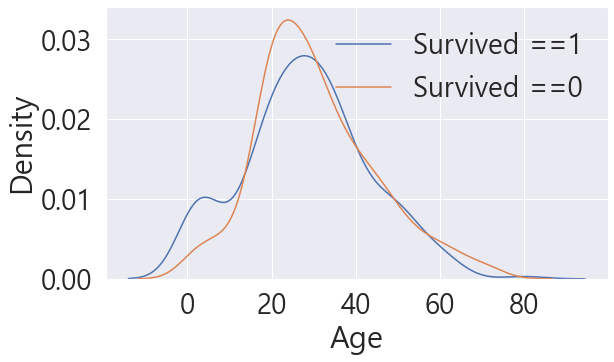

In [60]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survived ==1', 'Survived ==0'])
plt.show()

### 생존자 중 어린 나잇대가 가장 많음

### Age별, Pclass 별 생존자 구하기

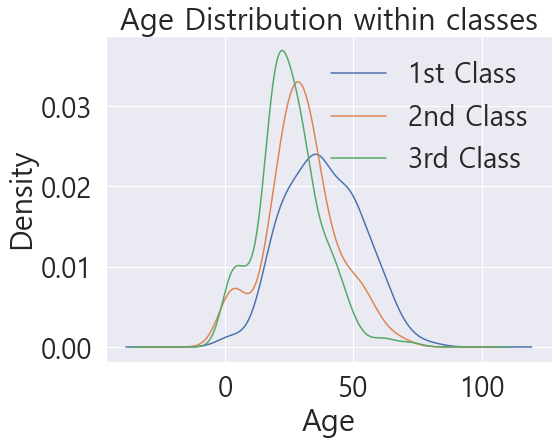

In [61]:
plt.figure(figsize = (8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

### Class가 높을 수록 연령층은 높아짐

### 나이별 생존률

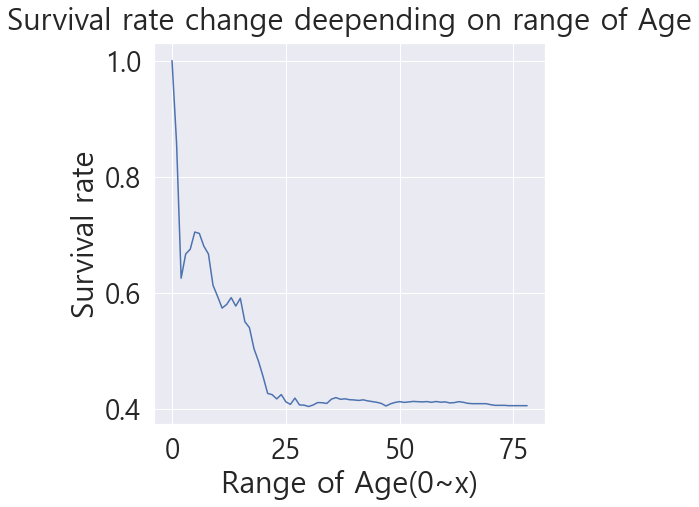

In [62]:
cummulate_survival_ratio = []

for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum()
                                   / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize = (7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change deepending on range of Age', y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

### 나이가 어릴수록 생존률이 높다, 나이는 중요한 feature이다.

## Pclass, Sex, Age 별 생존률

### seaborn의 violinplot

### x축은 우리가 나눠서 보고싶어하는 케이스(Pclass, Sex) y축은 보고싶어하는 분포(Age)

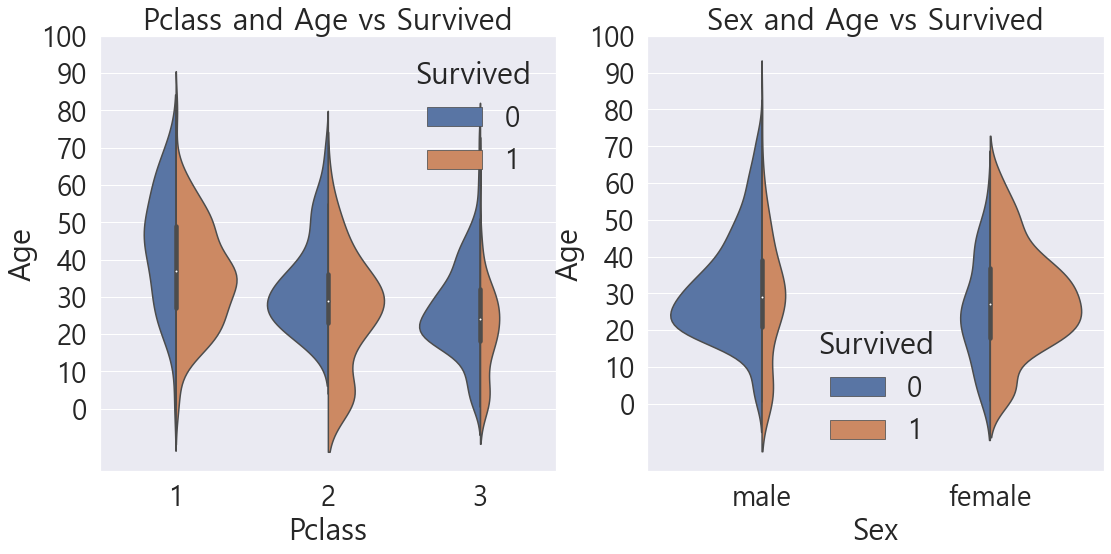

In [63]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', 
               data = df_train, scale = 'count', split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue = 'Survived',
              data = df_train, scale = 'count', split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

### 왼쪽 차트는 Pclass별로 Age의 분포와 생존여부를 보여주는 그래프
### 오른쪽 차트는 성별에, 나이에 따른 생존 분포를 보여주는 그래프
### 모든 클래스에서 나이가 어릴 수록 생존률이 높음.
### 오른쪽 차트에서 보면 여자가 남자보다 명확히 생존률이 높음

### 여자, 아이가 생존률이 높다

## Embarked
### 탑승 항구

<AxesSubplot:xlabel='Embarked'>

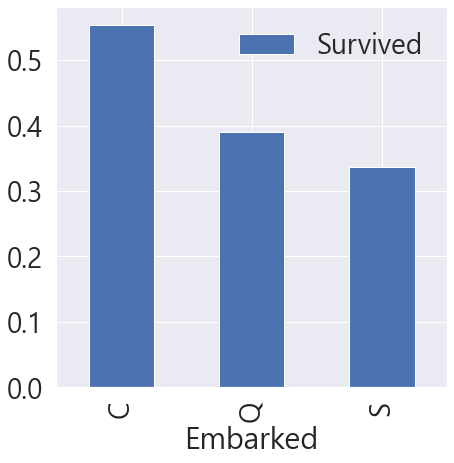

In [64]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean()\
.sort_values(by = 'Survived', ascending = False).plot.bar(ax=ax)

### 비슷하지만 C가 제일 높다.
### 다른 feature들로 split하여 확인

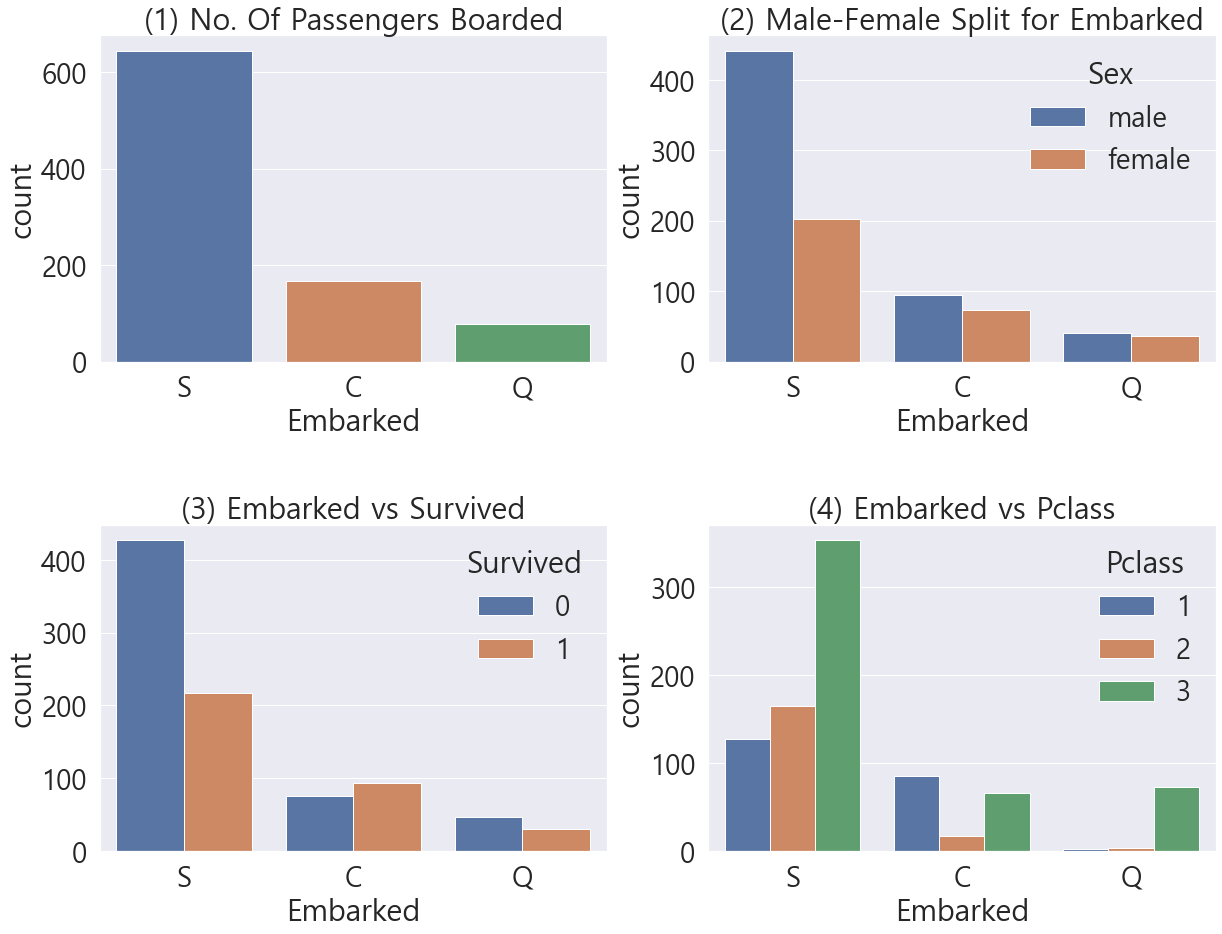

In [65]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot('Embarked', data = df_train, ax = ax[0,0])
ax[0, 0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue = 'Sex', data = df_train, ax = ax[0,1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue = 'Survived', data = df_train, ax = ax[1,0])
ax[1, 0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue = 'Pclass', data = df_train, ax = ax[1,1])
ax[1, 1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

### S항구에서 가장 많은 사람이 탑승함.
### C항구와 Q항구는 남녀의 비율이 비슷하고, S는 남자가 더 많다
### S항구가 생존확률이 많이 낮다.
### C항구가 생존확률이 높은 이유는 1st class 탑승자가 많기 때문, S가 생존확률이 낮은 이유는 3rd class 탑승자가 많기 때문이다

### Family - SibSp(형제 자매)  + Parch(부모, 자녀)
### SibSp와 Parch를 합치면 Family가 된다.

In [66]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야함
df_test['Family'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야함

In [67]:
print("Maximum size of Family: ", df_train['Family'].max())
print("Minimum size of Family: ", df_train['Family'].min())

Maximum size of Family:  11
Minimum size of Family:  1


### FamilySize와 생존의 관계

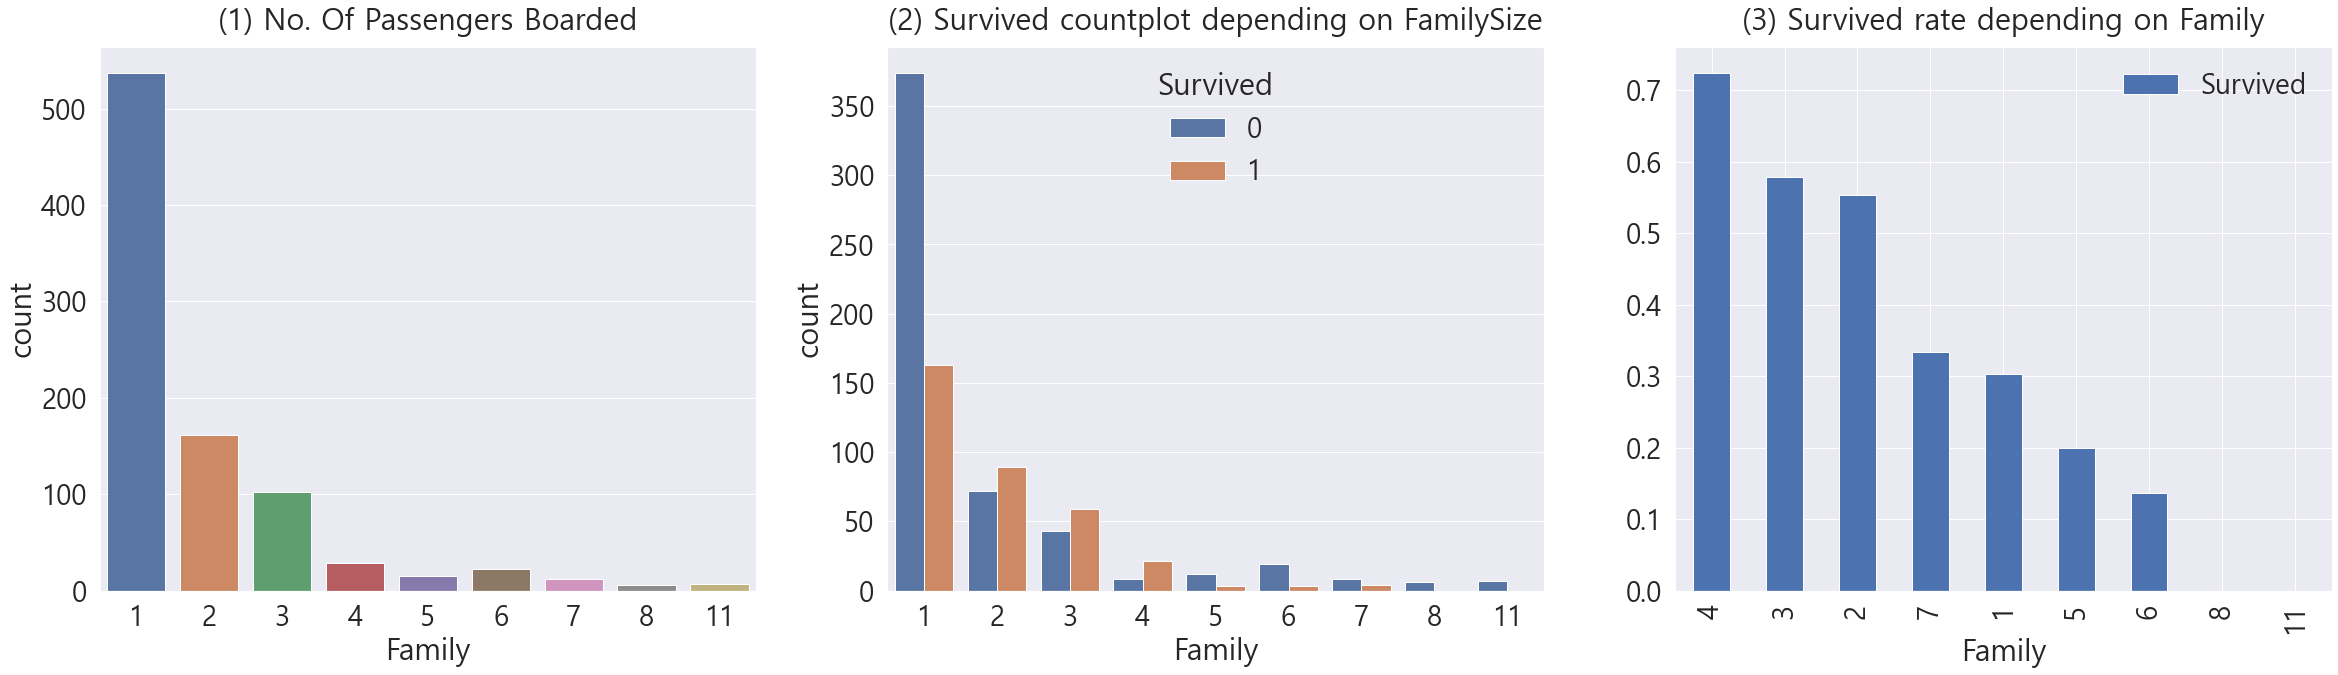

In [68]:
f, ax = plt.subplots(1, 3, figsize = (40, 10))
sns.countplot('Family', data = df_train, ax = ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y = 1.02)

sns.countplot("Family", hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title("(2) Survived countplot depending on FamilySize", y = 1.02)

df_train[['Family', 'Survived']].groupby(['Family'], as_index = True).\
mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax[2])
ax[2].set_title('(3) Survived rate depending on Family', y = 1.02)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

### 가족의 수는 1명부터 11명까지 있다. 대부분 1명이고 2, 3, 4 순이다.
### 가족이 4명인 경우가 생존확률이 가장 높다. 가족이 너무 적어도, 너무 많아도 생존확률은 낮다

## Fare
### Fare는 탑승요금이다. continuous feature이다.
### histogram을 통해 확인

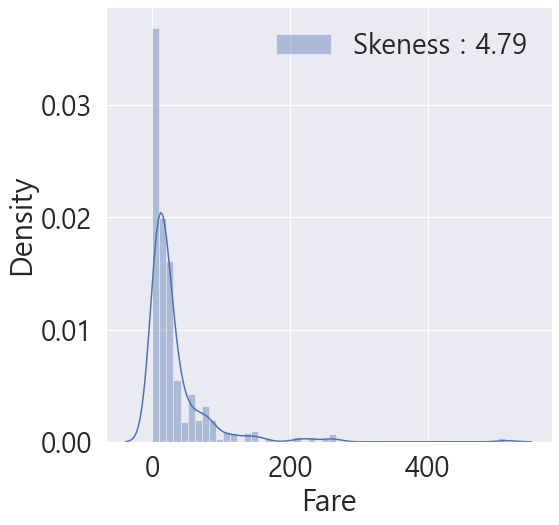

In [69]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(df_train['Fare'], color = 'b',\
                 label = 'Skeness : {:.2f}'.format(df_train['Fare'].skew()), ax = ax) 
# skew() 확률 분포의 비대칭성을 나타내는 지표
g = g.legend(loc = 'best')

### 분포가 매우 비대칭이다. 이대로 모델에 넣는다면 자칫 모델이 잘못 학습할 수 있다. 몇개없는 outlier에 대해 민감하게 반응한다면, 실제 예측 시 좋지 못한 결과를 부를 수 있다.

### outlier의 영향을 줄이기 위해 Fare에 log를 취함.


### pandas의 기능을 사용하여, dataFrame의 특정 columns에 공통된 작업을 적용하고싶으면 map, 또는 apply를 사용하면 된다.

### Fare columns에 log값을 취하기 lambda 함수를 이용해 간단한 로그 함수를 map에 인수로 넣어주면 됨.

In [70]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() 
# testset 에 있는 nan value 를 평균값으로 치환

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

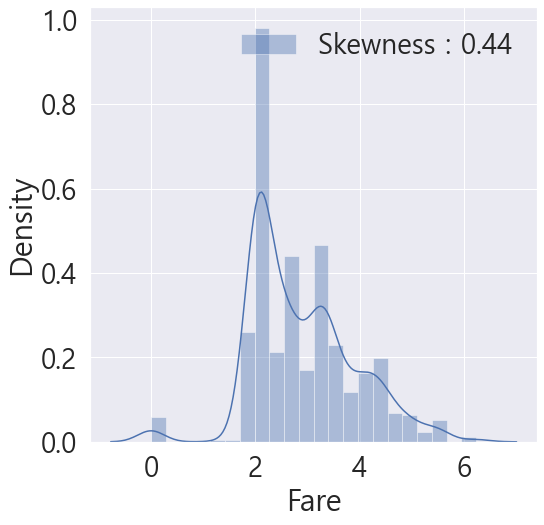

In [71]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'.\
                 format(df_train['Fare'].skew()), ax = ax)
g = g.legend(loc = 'best')

### log값으로 처리하니, 비대칭성이 많이 줄어듬
### feature engineering =  feature들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것 

## Cabin
### Cabin feature는 NaN이 대략 80%이므로, 생존에 영향을 미칠 확률이 적다
### 모델에 적용 X

In [72]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


## Ticket
### string data 가공하기

In [73]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

# Feature engineering

## dataset에 존재하는 Null data 채우기
### null data를 포함하는 feature의 statistics를 참고하거나 다른 아이디어를 짜내어 채워야함.
### null data를 어떻게 채우느냐에 따라 모델의 성능이 갈린다.
### 실제 모델의 학습에 사용하려고 하는 것이기 때문에 train, test 모두 적용해야함

## Fill Null in Age
### Age에는 Null data가 177개 있다. title + statistics를 사용하겠다.
### Miss, Mr, Mrs같은 title을 이용
### pandas의 data를 string으로 바꿔주는 str method, 정규표현식을 적용하게 해주는 extract method를 사용하여 title 추출

In [74]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

### pandas의 crosstab을 이용하여 추출한 Inital과 Sex 간의 관계를 살펴봄

In [75]:
pd.crosstab(df_train['Initial'], df_train['Sex']).\
T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


### crosstab을 사용하여 남자, 여자가 쓰는 inital을 구분, replace method를 사용하여 특정 데이터 값을 원하는 값으로 치환.

In [76]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

### inital로 groupby하여 평균치를 추출
### 여성과 관계있는 Miss, Mr, Mrs가 생존률이 높다는 것을 확인

In [78]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='Initial'>

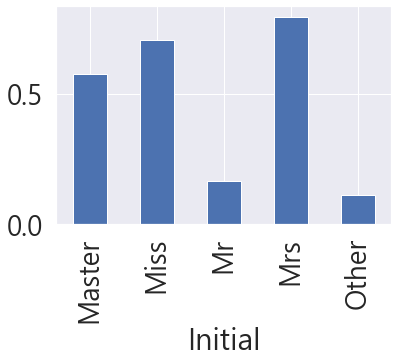

In [77]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

### Null data를 채우는 방법은 많이 존재한다. statistics를 활용하는 방법, null data가 없는 데이터를 기반으로 머신러닝 알고리즘을 만들어 예측한 후 채워 넣는 방법이 있다. 여기서는 statistics를 활용하여 채워넣는다.

### statistics는 train data의 것을 말함. test는 unseen으로 둔 상태여야하며, train에서 얻은 statistics를 기반으로 test의 null data를 채워야한다.

In [80]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


### Age의 mean을 이용해 null data를 채움. (Master, Miss, Mr, Mrs, Other의 평균값)
### pandas의 datafram을 다룰 때는 boolean array를 이용하여 indexing하는 것이 편리하다.

In [81]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Ohter'), 'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Mr'), 'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Mrs'), 'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Master'), 'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial == 'Other'), 'Age'] = 46

### 다른 예시 https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling 

## Fill Null in Embarked

In [85]:
print('Embarked has ', df_train['Embarked'].isnull().sum(), ' Null values')

Embarked has  2  Null values


### Embarked는 Null values가 2개이고, S가 가장 많이 있으므로 Null을 S로 채움

In [86]:
df_train['Embarked'].fillna('S', inplace = True) # inplace = Ture를 해야 실제로 적용됨

## Change Age(continuous to categorical)

### Age는 현재 continuous to categorical이기 때문에 몇개의 group으로 나누어 category화 시킬 것(continuous를 categoriacl로 변환하면 information loss가 발생할 수 있음)

### loc를 사용하여 변환하는 방법

In [92]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

### 함수를 만들어 apply 메소드에 넣어주는 방법

In [93]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

### 두 개의 값이 같은 결과를 나타내는지 확인
### Series간 boolean 비교 후 .all method 사용(모든 값이 True면 True, 하나라도 False면 False)

In [95]:
print("1번 , 2번 같은 결과를 내면 True, 아니면 False -> ", 
      (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 , 2번 같은 결과를 내면 True, 아니면 False ->  True


### 중복되는 Age_cat_2, Age columns 제거

In [96]:
df_train.drop(['Age', 'Age_cat_2'], axis = 1, inplace = True)
df_test.drop(['Age'], axis = 1, inplace = True)

https://kaggle-kr.tistory.com/18?category=868316 3.3 Change Initial, Embarked and Sex (string to numerical)부터